In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

* It can be used as a dimensionality reduction method, which can help to minimize the number of the variables (or columns of a data frame) without losing much of the original information. This is useful especially when you are building machine learning models based on the data with many variables like 100s or 1000s.

* It is an unsupervised stastical technique used to examine the interrelations among a set of variables in order to identify the underlying structure of those variables

* It is also known as general factor analysis

* While regression determines a line of best fit to a dataset, factor analysis or principal component analysis determines several orthogonal lines of best fit to the dataset.Orthogonal means at right angles. The lines are perpendicular to each other in n dimensional space where n dimensional space is the variable sample space. There as many dimensions as there are variables,i.e., a dataset with 4 variables the sample space is 4 dimensional.

* If we use this technique on a dataset with large numbers of variables, we can compress the amount of explained variation to just a few components.



* PCA is just a transformation of our data and attempts to find out what features excplain the most variance in our data

* We try to get rid of the components that do not explain enough the variance in our data.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
cancer.keys()
#This is a special type of dataset of sklearn

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

* The data contains 569 rows and 30 variables or columns

* What we are going to do is to figure out what compenents are important to explain the variance of the data.

In [5]:
cancer["data"]
# This is the data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [6]:
cancer["feature_names"]
#This is the feature names of the data

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

* Now we are going to combine the feature names with the data and make a dataframes

In [7]:
df=pd.DataFrame(cancer["data"],columns=cancer["feature_names"])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


* In this dataset, there are 30 dimensions or variables, thus it is difficult to visualize all of them. We can utilize PCA to learn the two most important components of the data and visualize the data in this new two dimensional space. 

* Before we use PCA in the data, we need to standartize the variables by using standart scaler of sklearn

In [8]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)

In [9]:
scaled_data 

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

* Standart Scaler transformed our data into a numpy array and standartized all of the variables of the data 

In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) # we make an instance of PCA and decide how many components we want to have


In [11]:
pca.fit(scaled_data) # We make PCA fit to our scaled data

PCA(n_components=2)

In [12]:
transformed_data=pca.transform(scaled_data)

In [13]:
scaled_data.shape
#This is the original shape of the data with 569 rows and 30 columns

(569, 30)

In [14]:
transformed_data.shape
#Here we see 569 rows but 2 columns or components after PCA implementation

(569, 2)

In [15]:
transformed_data

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

* The data has been reduced to the two most important components via PCA that we can easily plot out.

Text(0, 0.5, 'The Second Principal Component')

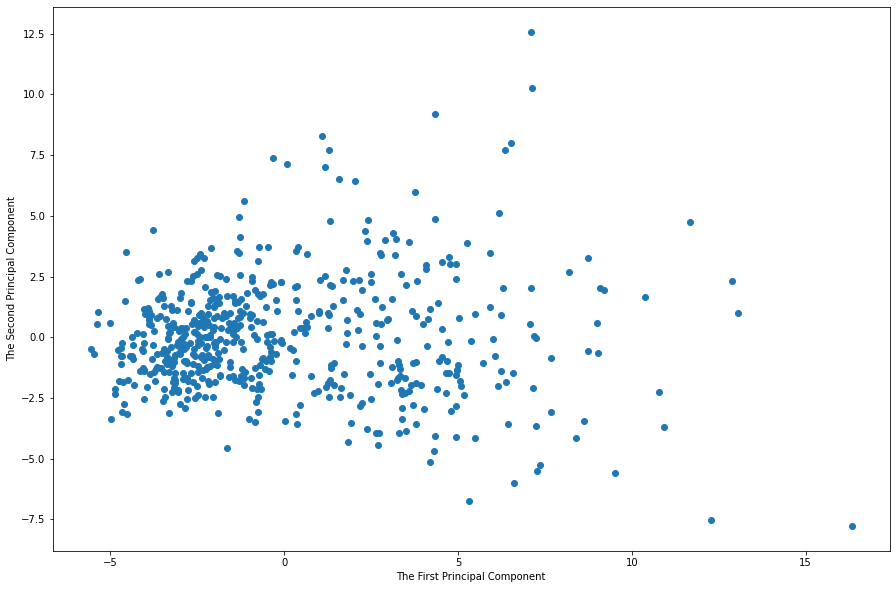

In [16]:
plt.figure(figsize=(15,10))
plt.scatter(transformed_data[:,0],transformed_data[:,1])
plt.xlabel("The First Principal Component")
plt.ylabel("The Second Principal Component")
#Here we plot all the rows of columns 1 and column 2 in a scatterplot.

* This plot does not explain much, we can add some paramaters to the same plot in order to show the positions of the components according the target variable of the data

Text(0, 0.5, 'The Second Principal Component')

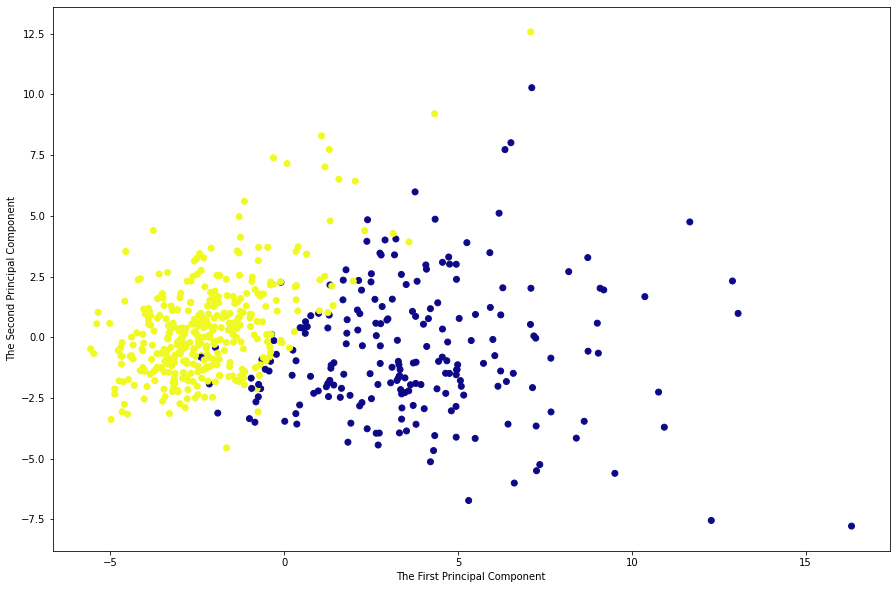

In [17]:
plt.figure(figsize=(15,10))
plt.scatter(transformed_data[:,0],transformed_data[:,1],c=cancer["target"],cmap="plasma")
plt.xlabel("The First Principal Component")
plt.ylabel("The Second Principal Component")
#Here we plot all the rows of columns 1 and column 2 in a scatterplot.

In [18]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

* Each row represents actual componnents and each column relates back original features.

* We can see the relationship better via a heatmap.

* But first we need to transfor it into a dataframe in order to use the visualization libraries.

In [19]:
df_comp=pd.DataFrame(pca.components_,columns=cancer["feature_names"])
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
1,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


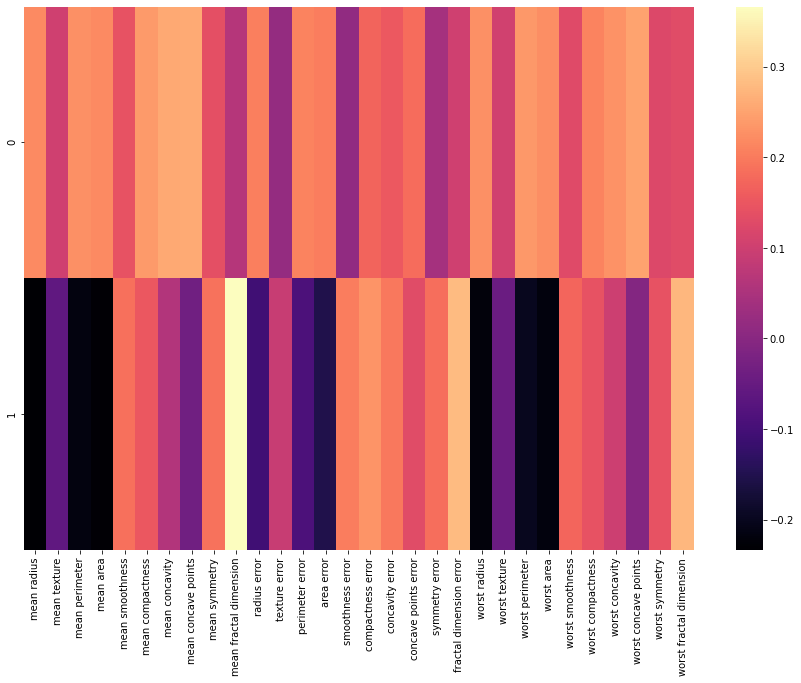

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(df_comp,cmap="magma")

* In this heatmap above, we see the relation between the principal components and actual features

* The ligh color in the heatmap shows strong correlation between the principal components and actual features while dark colors show the opposite or negative correlation.

* Actually the principal components are the combinations of all these features of the data.

* After we get the principal components of the data, we can feed them into a machine learning algorithm because we have clear and separated components of the data instead of the complex variables.

* For this data we do a logistic regression on tranformed_data instead of doing regression with the entire data.

* Support vector machines can also be a good alternative for this data.

In [21]:
X=transformed_data
y=cancer["target"]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [23]:
from sklearn.linear_model import LogisticRegression
log_regression=LogisticRegression()
log_regression.fit(X_train,y_train)

LogisticRegression()

In [24]:
#Now our model is ready to predict the test data
predictions=log_regression.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

In [25]:
#Now it is time to evaluate how good the predictions are
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))
#The precision and accuracy precentages are over %90, it is very good

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        66
           1       0.97      0.95      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



* It is obvious that we can get pretty good prediction by using just the two principal components of the data instead of using all of the dataset.

* PCA can be very useful tool big data with many features.

* Now we will also use Support Vector Machines Algorithm with the PCA

* Because we have already siplitted data in the previous algorithm, we just skip this stage

In [26]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(X_train,y_train)

SVC()

In [27]:
predictions=svm_model.predict(X_test)
predictions

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1])

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
#here we get the classification report to learn how accurate our model is

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        66
           1       0.91      0.95      0.93       105

    accuracy                           0.91       171
   macro avg       0.91      0.90      0.91       171
weighted avg       0.91      0.91      0.91       171



* The precision and accuracy precentages are over %90, it is very good although it is not as good as logistic regression

It is obvious that we can get pretty good prediction by using just the two principal components of the data instead of using all of the dataset.